In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('AirQualityUCI.csv', sep=',', delimiter=";",decimal=",")

In [4]:
data = data.drop(["Unnamed: 15","Unnamed: 16"], axis=1) 

In [5]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [7]:
data.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [8]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [9]:
data.dropna(inplace=True)
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S').dt.hour
type(data['Time'][0])

numpy.int64

In [11]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB


In [13]:
data.describe()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [14]:
data.apply(lambda x : x == -200).sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [15]:
data.drop('NMHC(GT)', axis=1, inplace=True)

In [16]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [17]:
def remove_outlier(col):
    data[col] = data.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))

In [18]:
col_list = data.columns[1:]

for i in col_list:
    remove_outlier(i)


In [19]:
data.fillna(method='ffill', inplace= True)

In [20]:
data.isnull().any()

Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [22]:
data.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.082589,1099.748224,10.050981,937.915962,239.419651,835.378257,109.382418,1449.952952,1026.513193,18.167474,49.288300,1.018346
std,6.923182,1.383347,215.205784,7.368172,264.142162,200.833596,253.425632,46.058214,344.209200,398.438298,8.833685,17.200755,0.403606
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.100000,939.000000,4.500000,734.000000,102.000000,663.000000,76.000000,1223.000000,736.000000,11.500000,36.123529,0.727600
50%,11.000000,1.700000,1065.000000,8.200000,908.000000,177.000000,807.476190,103.608696,1454.000000,966.000000,17.600000,49.600000,0.988100
75%,18.000000,2.700000,1226.647059,14.000000,1118.000000,316.000000,967.000000,135.000000,1662.000000,1275.000000,24.300000,62.500000,1.309917
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


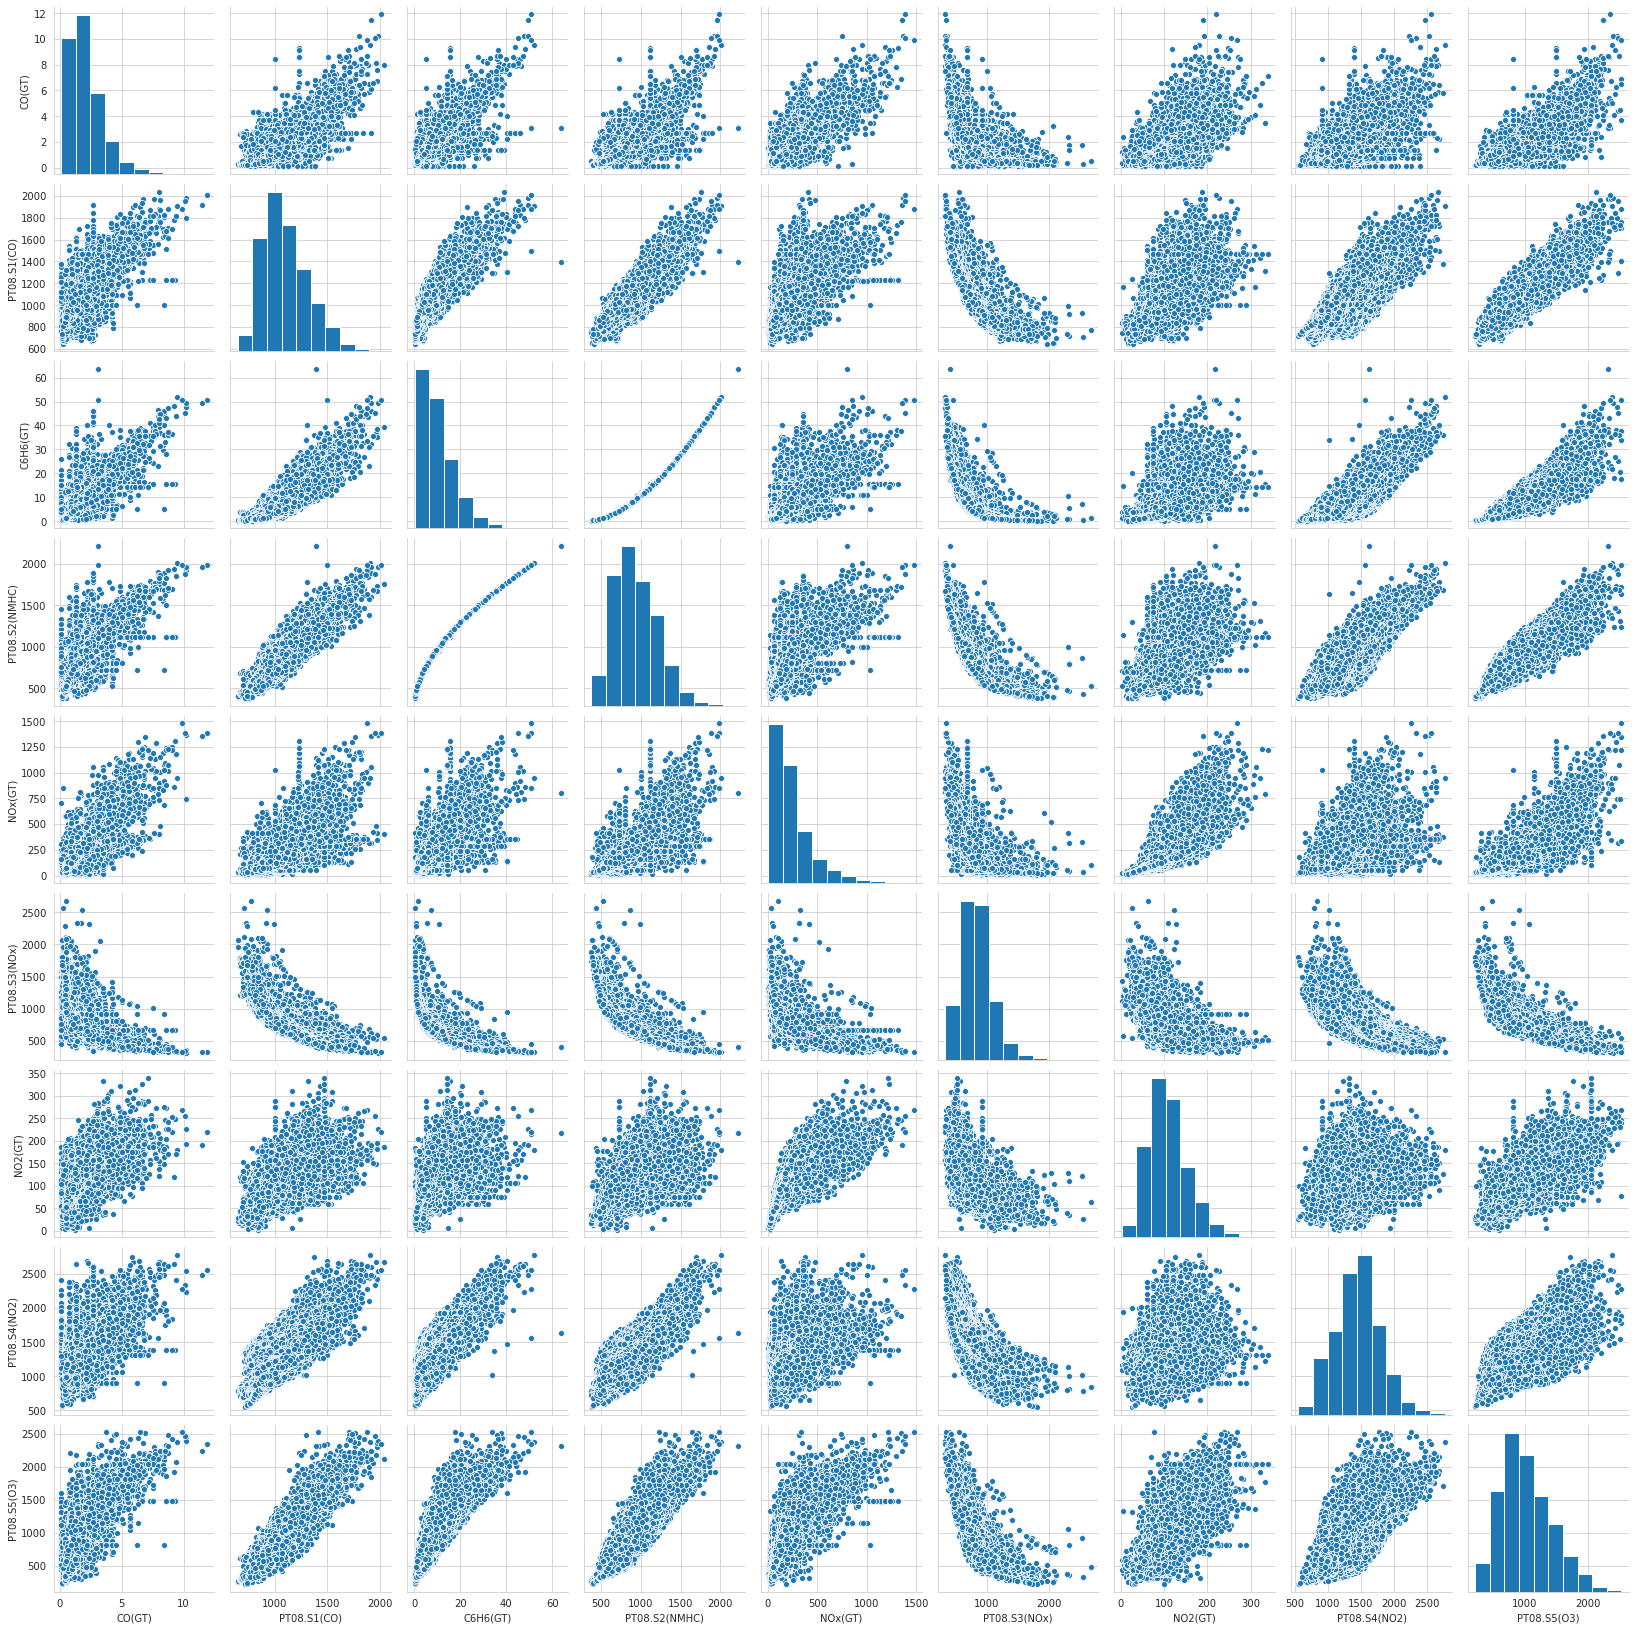

In [23]:
sns.set_style('whitegrid')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)

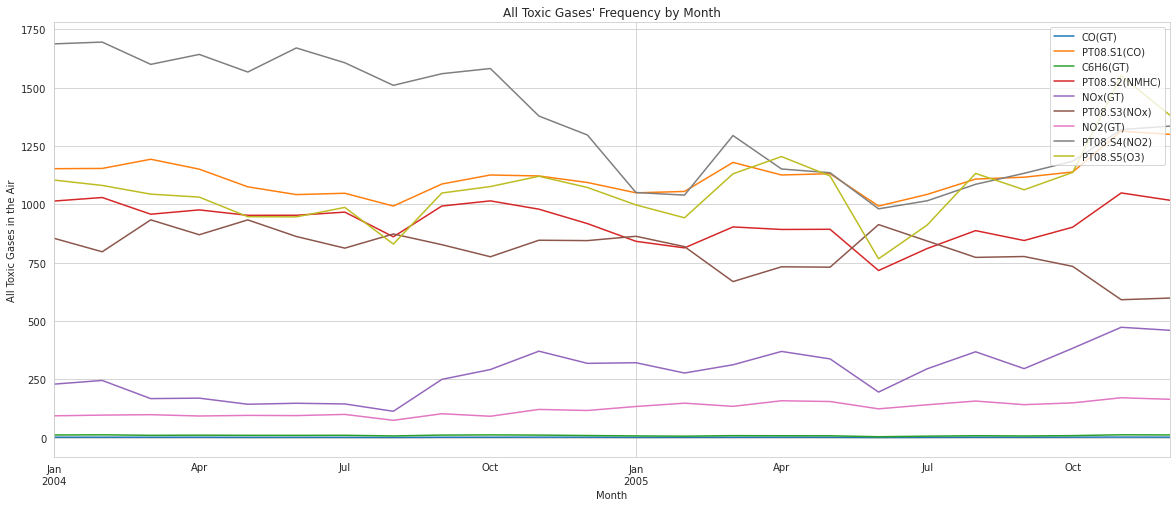

In [24]:

data.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month");

In [37]:
data.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Level by Month')

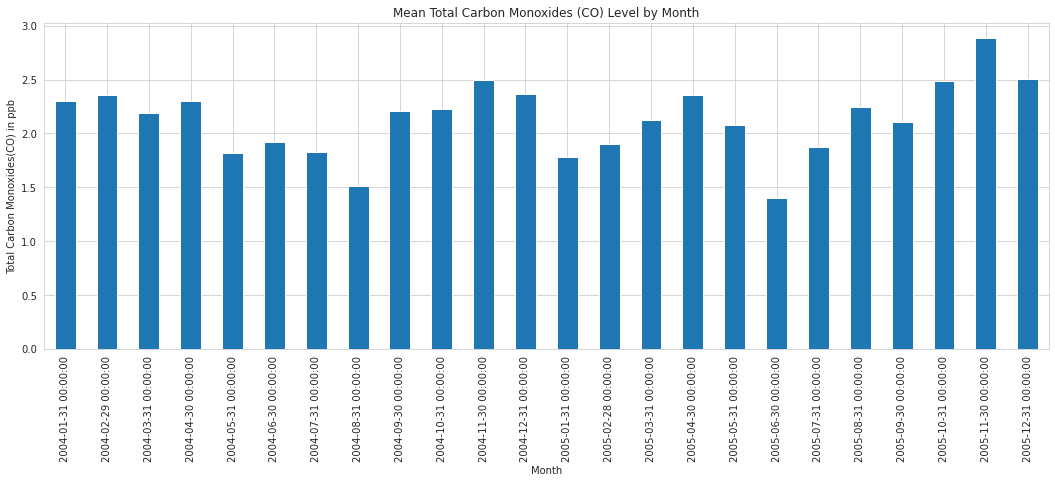

In [27]:
data['CO(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Carbon Monoxides(CO) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Level by Month")

Text(0.5, 1.0, 'Mean Total Benzene(C6H6) Level by Month')

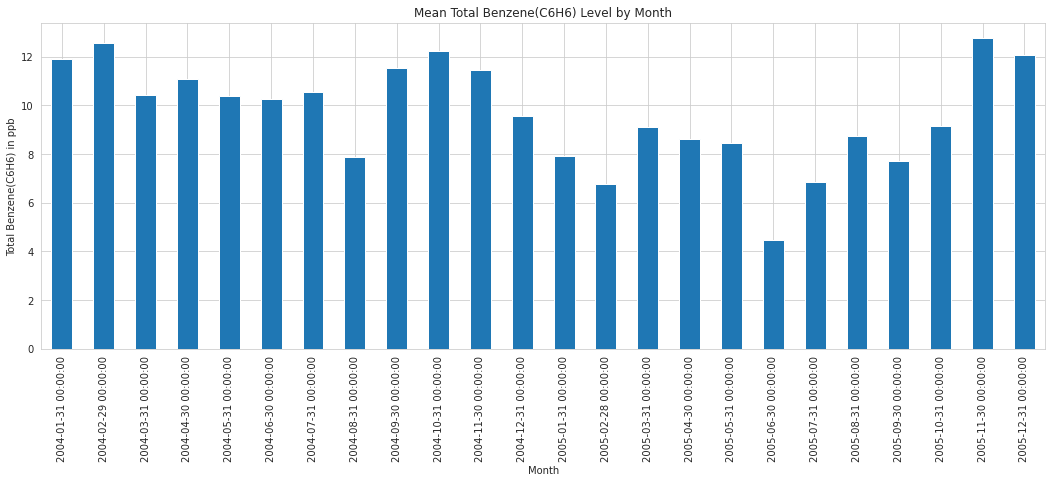

In [28]:
data['C6H6(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Benzene(C6H6) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Benzene(C6H6) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NOx) Level by Month')

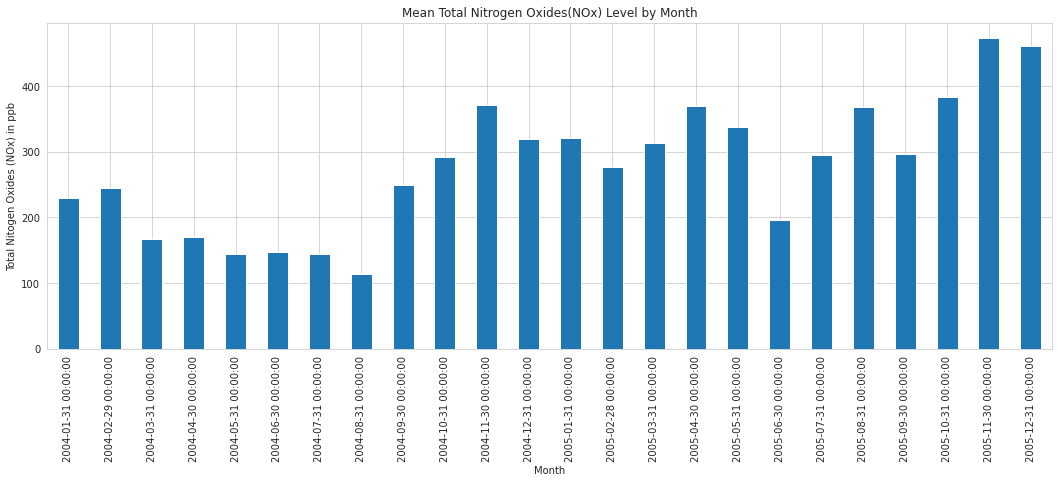

In [29]:
data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NOx) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Level by Month')

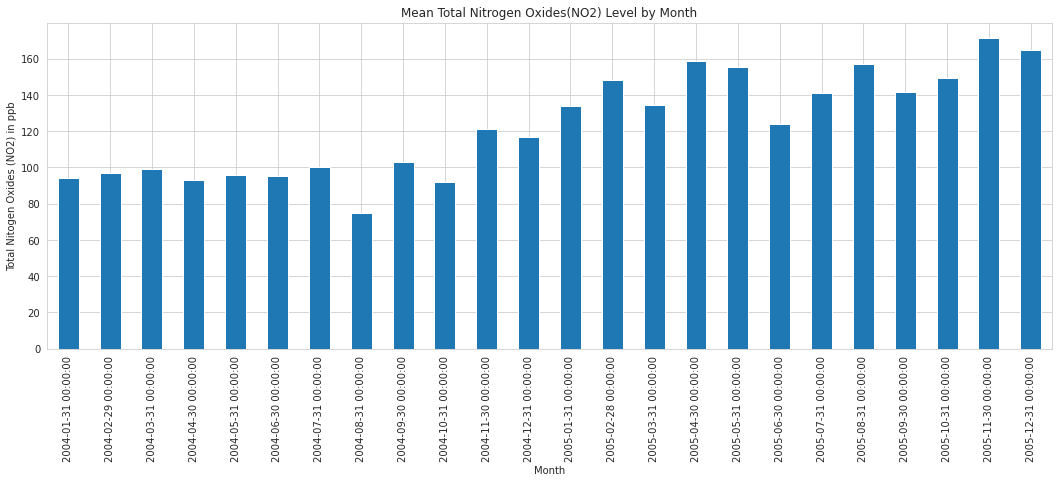

In [30]:
data['NO2(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NO2) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Level by Month")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Level by Month')

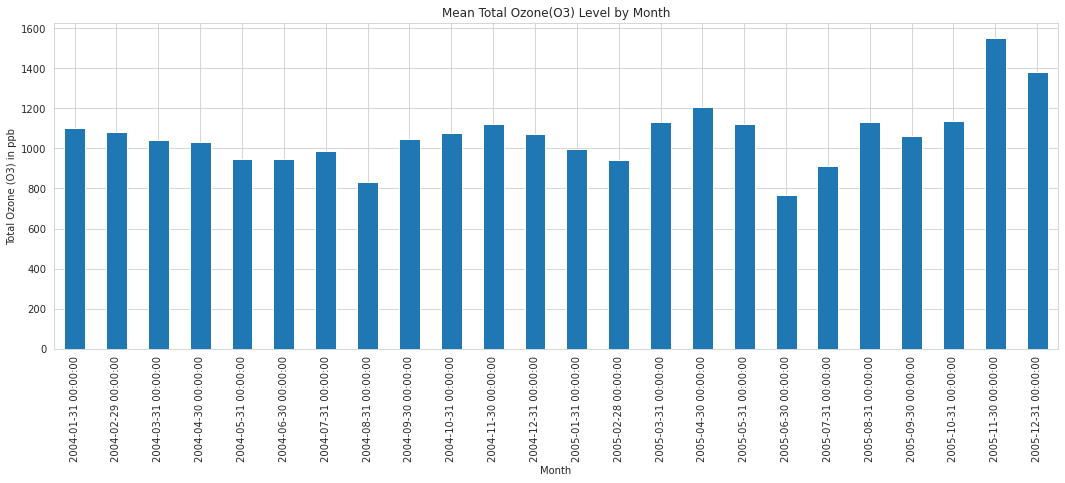

In [31]:
data['PT08.S5(O3)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Ozone (O3) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

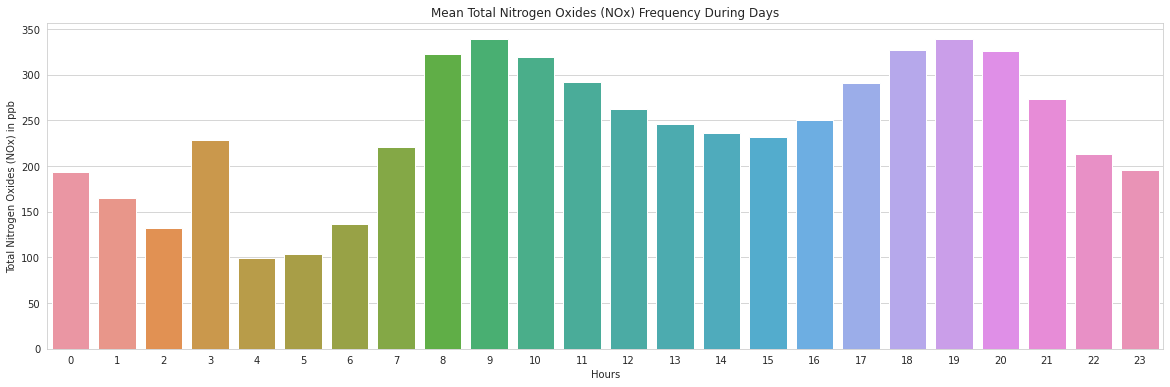

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Frequency During Days')

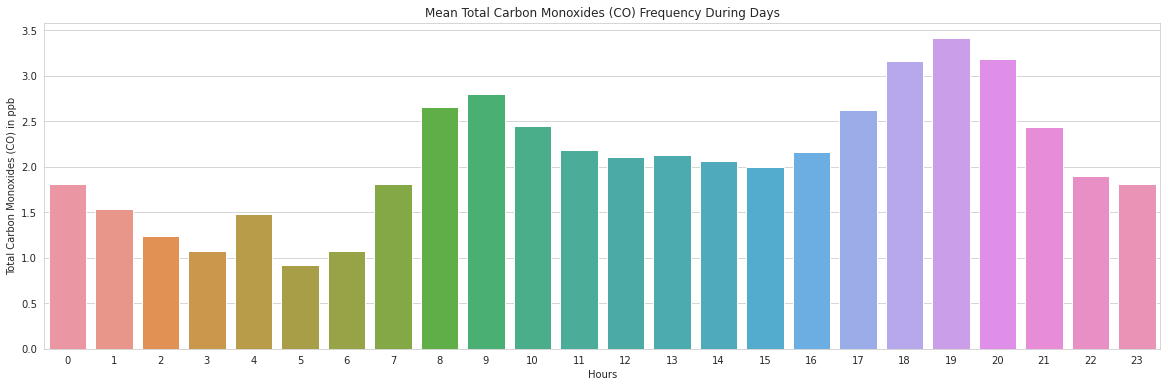

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='CO(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Carbon Monoxides (CO) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Benzene (C6H6) Frequency During Days')

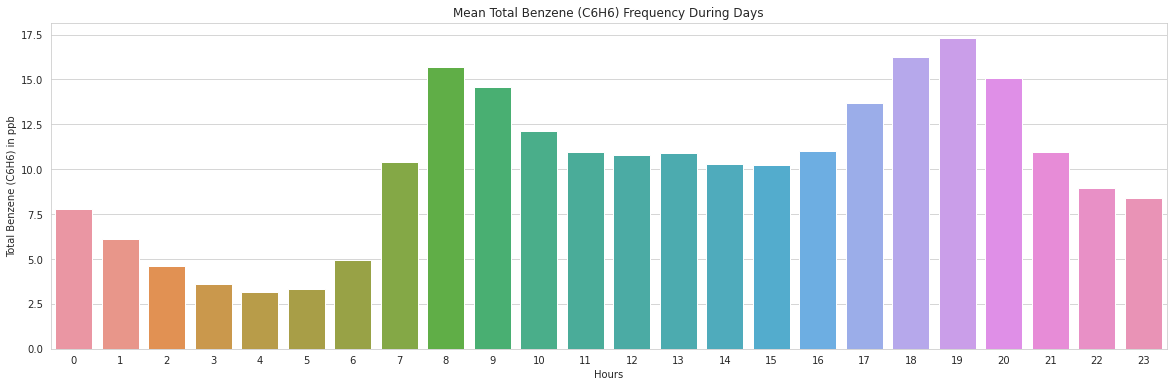

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='C6H6(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Benzene (C6H6) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Benzene (C6H6) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Frequency During Days')

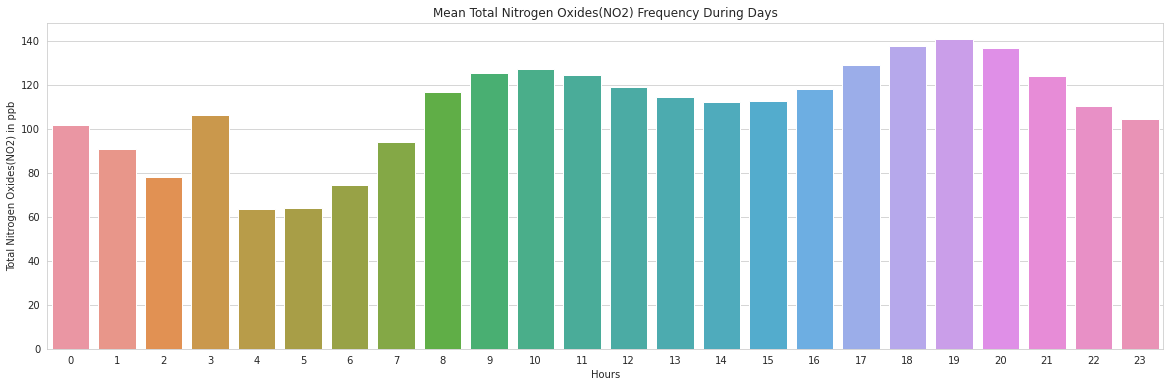

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NO2(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides(NO2) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Frequency During Days')

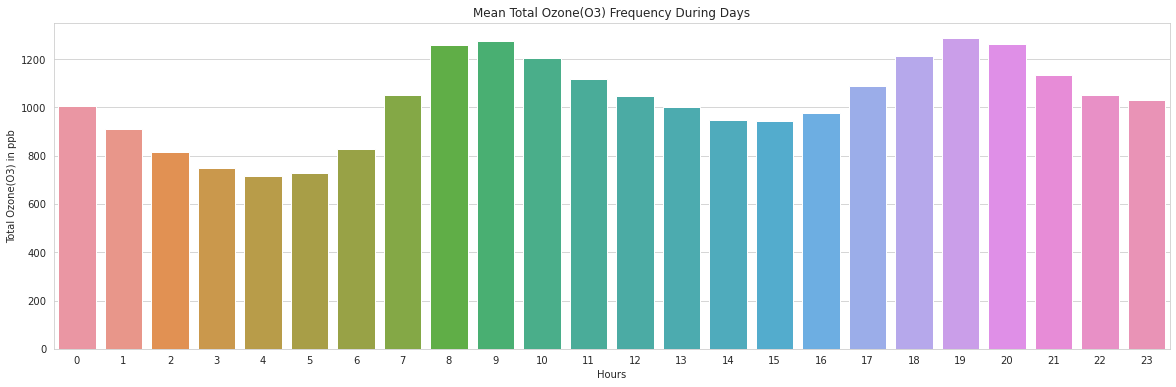

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='PT08.S5(O3)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Ozone(O3) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Frequency During Days")

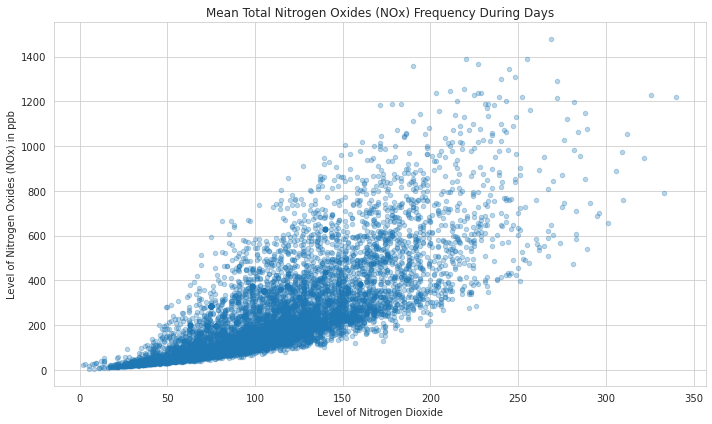

In [41]:
data.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

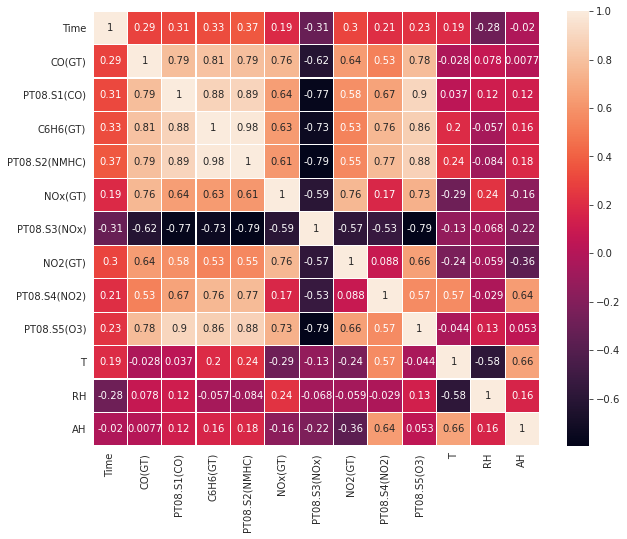

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.20)

In [43]:
X = data.drop(['NOx(GT)','T','Time'], axis=1)

y= data['NOx(GT)']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
print(lm.intercept_)

-50.159845686669456


In [51]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


In [52]:
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

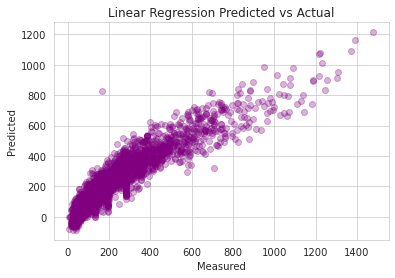

In [53]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [54]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8513856922248191

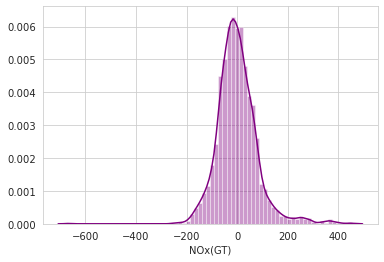

In [55]:
sns.distplot((y_test-prediction), bins=70, color="purple")

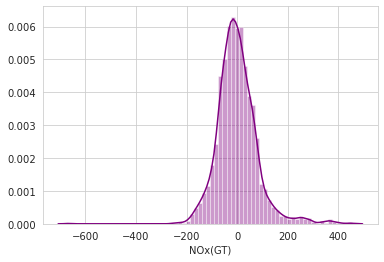

In [56]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 63.76253407645148
MSE: 7829.931760884362
RMSE: 88.48690163456037


In [60]:
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


In [62]:
from sklearn.linear_model import Lasso

In [63]:
l = Lasso()

In [64]:
l.fit(X_train, y_train)

Lasso()

In [65]:
print(l.intercept_)

-27.071033964536383


In [66]:
coeff_data = pd.DataFrame(l.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),48.174008
PT08.S1(CO),-0.081808
C6H6(GT),11.681103
PT08.S2(NMHC),0.241038
PT08.S3(NOx),0.068633
NO2(GT),1.464887
PT08.S4(NO2),-0.439973
PT08.S5(O3),0.066639
RH,2.370975
AH,144.911714


In [68]:
prediction = l.predict(X_test)

Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

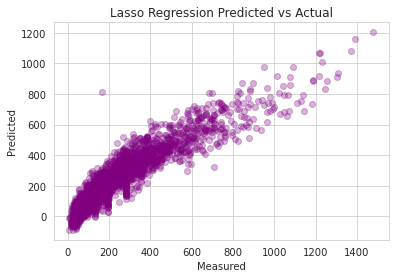

In [70]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

In [71]:
lasso_regression_score = l.score(X_test, y_test)
lasso_regression_score

0.8508209583896463

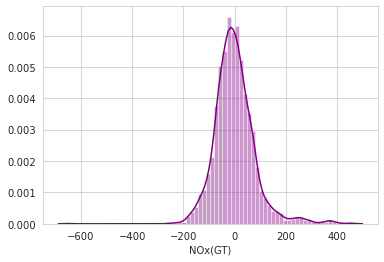

In [72]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [99]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 57.40341930660829
MSE: 6422.689290502268
RMSE: 80.14168260338853


In [74]:
coeff_data

,Coefficient
CO(GT),48.174008
PT08.S1(CO),-0.081808
C6H6(GT),11.681103
PT08.S2(NMHC),0.241038
PT08.S3(NOx),0.068633
NO2(GT),1.464887
PT08.S4(NO2),-0.439973
PT08.S5(O3),0.066639
RH,2.370975
AH,144.911714


In [75]:
from sklearn.linear_model import Ridge

In [76]:
r = Ridge()

In [77]:
r.fit(X_train, y_train)

Ridge()

In [78]:
print(r.intercept_)

-49.13324850787578


In [79]:
coeff_data = pd.DataFrame(r.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),49.802437
PT08.S1(CO),-0.069911
C6H6(GT),11.948063
PT08.S2(NMHC),0.256471
PT08.S3(NOx),0.086095
NO2(GT),1.486294
PT08.S4(NO2),-0.473953
PT08.S5(O3),0.066450
RH,2.279268
AH,169.976170


In [80]:
prediction = r.predict(X_test)

Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

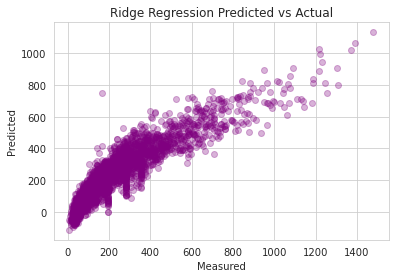

In [104]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')

In [82]:
linear_regression_score = r.score(X_test, y_test)
linear_regression_score

0.8513951106807158

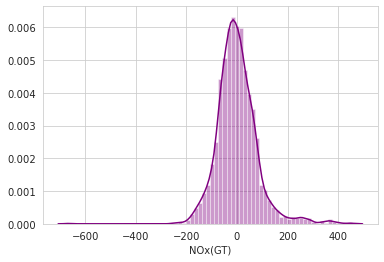

In [83]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 63.76253407645148
MSE: 7829.931760884362
RMSE: 88.48690163456037


In [84]:
coeff_data

,Coefficient
CO(GT),49.802437
PT08.S1(CO),-0.069911
C6H6(GT),11.948063
PT08.S2(NMHC),0.256471
PT08.S3(NOx),0.086095
NO2(GT),1.486294
PT08.S4(NO2),-0.473953
PT08.S5(O3),0.066450
RH,2.279268
AH,169.976170


In [106]:
from sklearn.linear_model import ElasticNet

In [86]:
e = ElasticNet()

In [87]:
e.fit(X_train, y_train)

ElasticNet()

In [88]:
print(e.intercept_)

53.019423723217784


In [89]:
coeff_data = pd.DataFrame(e.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),25.313302
PT08.S1(CO),-0.131548
C6H6(GT),11.755534
PT08.S2(NMHC),0.159220
PT08.S3(NOx),-0.012755
NO2(GT),1.492849
PT08.S4(NO2),-0.256601
PT08.S5(O3),0.067929
RH,3.010745
AH,11.462832


In [101]:
prediction = e.predict(X_test)

Text(0.5, 1.0, 'ElasticNet Regression Predicted vs Actual')

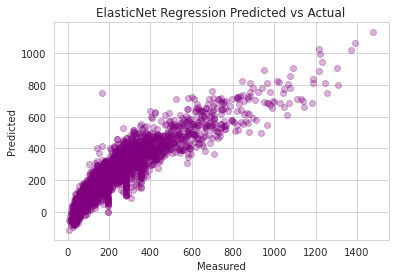

In [103]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression Predicted vs Actual')

In [100]:
elasticnet_regression_score = e.score(X_test, y_test)
elasticnet_regression_score

0.8188235743722652

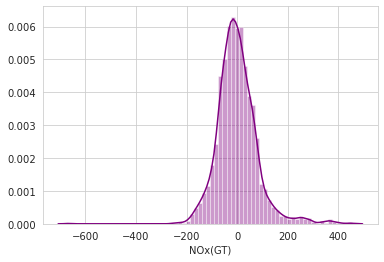

In [93]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 57.40341930660829
MSE: 6422.689290502268
RMSE: 80.14168260338853


In [95]:
coeff_data

,Coefficient
CO(GT),25.313302
PT08.S1(CO),-0.131548
C6H6(GT),11.755534
PT08.S2(NMHC),0.159220
PT08.S3(NOx),-0.012755
NO2(GT),1.492849
PT08.S4(NO2),-0.256601
PT08.S5(O3),0.067929
RH,3.010745
AH,11.462832
